# Load Packages

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import stats
import seaborn as sns
sns.set_context('paper')
import os

# Decay Constants and Conchordia

In [62]:
λ238=1.55125E-10
λ235=9.8485E-10
λ232=4.9475E-11
time=np.linspace(0,4500000000,10000)
conchordia=pd.DataFrame(index=time)
conchordia['206/238']=np.exp(conchordia.index*λ238)-1
conchordia['207/235']=np.exp(conchordia.index*λ235)-1

# Fetch Data

In [63]:
!curl -LJO https://github.com/danielbabin/Zircon_Standards/raw/master/Results/Results_Ples_Reduce_20_um_long.csv
!curl -LJO https://github.com/danielbabin/Zircon_Standards/raw/master/Results/Results_Ples_Reduce_40_um_long.csv
!curl -LJO https://github.com/danielbabin/Zircon_Standards/raw/master/Raw/_7807_TRA_Data_burpless.csv
!curl -LJO https://github.com/danielbabin/Zircon_Standards/raw/master/Raw/_7807_TRA_Data.csv
!curl -LJO https://github.com/danielbabin/Zircon_Standards/raw/master/Supplementary%20Data/standards_composition.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   178  100   178    0     0    872      0 --:--:-- --:--:-- --:--:--   872
100 59361  100 59361    0     0   152k      0 --:--:-- --:--:-- --:--:--  152k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   178  100   178    0     0    922      0 --:--:-- --:--:-- --:--:--   927
100 37764  100 37764    0     0   111k      0 --:--:-- --:--:-- --:--:-- 7830k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   167  100   167    0     0    943      0 --:--:-- --:--:-- --:--:--   943
100  462k  100  462k    0     0   970k      0 --:--:-- --:--:-- --:--:--  970k
  % Total    % Received % Xferd  Average Speed   Tim

# 40 um Spot Raw Data

In [74]:
_7807={}
_7807['burpless']=pd.read_csv('_7807_TRA_Data_burpless.csv',header=25).dropna()
_7807['burp']=pd.read_csv('_7807_TRA_Data.csv',header=25).dropna()

# Different Spots

In [75]:
spots={}
spots['20']=pd.read_csv('Results_Ples_Reduce_20_um_long.csv')
spots['40']=pd.read_csv('Results_Ples_Reduce_40_um_long.csv')

# Problem with 40 um Spot Run
It seems like there was a burp. Maybe a clog? Or something got dirty?

Text(0, 0.5, 'Pb(206)')

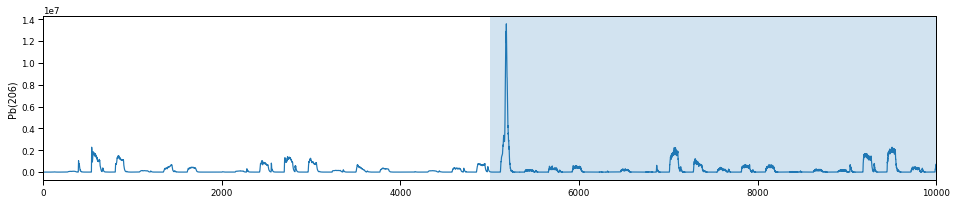

In [76]:
fig,ax=plt.subplots(figsize=(16,3))
_7807['burp']['Pb(206)'].plot(ax=ax)
ax.axvspan(xmin=5000,xmax=10000,alpha=.2)
ax.set_ylabel('Pb(206)')

The background also goes very high. This is the Pb206 signal

Text(0, 0.5, 'Pb(206)')

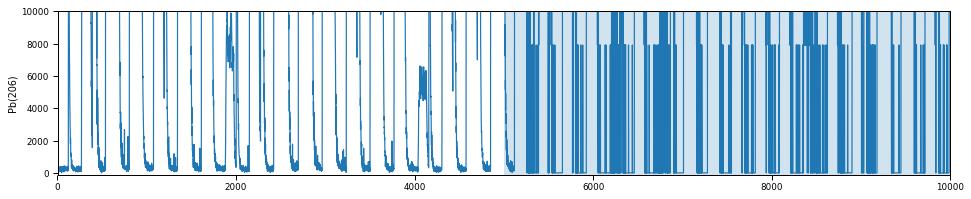

In [77]:
fig,ax=plt.subplots(figsize=(16,3))
_7807['burp']['Pb(206)'].plot(ax=ax)
ax.axvspan(xmin=5000,xmax=10000,alpha=.2)
ax.set_ylim(-100,10000)
ax.set_ylabel('Pb(206)')

So, I cut those analyses from the raw data

Text(0, 0.5, 'Pb(206)')

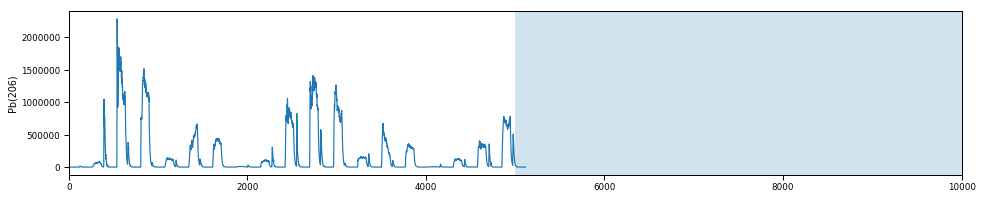

In [78]:
fig,ax=plt.subplots(figsize=(16,3))
_7807['burpless']['Pb(206)'].plot(ax=ax)
ax.axvspan(xmin=5000,xmax=10000,alpha=.2)
ax.set_xlim(0,10000)
ax.set_ylabel('Pb(206)')

# U/Pb Ratios and Ages from Literature
Compiled. Uncertainty from ages represents an age range spanned by the 235 and 238 ages. It should be noted that the uncertainty for the ages are extremely small relative to our uncertainties (factor of 10-20)

In [79]:
literature=pd.read_csv('standards_composition.csv')
literature

,Standard,206/238,2s,207/235,2s.1,207/206,2s.2,Reference,Age,Age 2s
0,FC1,0.185325,0.000183,1.944989,0.001828,0.076117,0.000017,"Mattison et al., 2010",1098.0,1.5
1,FC1,0.185197,0.000183,1.944437,0.001828,0.076148,0.000017,"Mattison et al., 2011",1098.0,1.5
2,FC1,0.185133,0.000183,1.943462,0.001828,0.076136,0.000017,"Mattison et al., 2012",1098.0,1.5
3,FC1,0.185137,0.000183,1.943079,0.001828,0.076119,0.000017,"Mattison et al., 2013",1098.0,1.5
4,FC1,0.185173,0.000183,1.943614,0.001828,0.076126,0.000017,"Mattison et al., 2014",1098.0,1.5
5,FC1,0.185042,0.000183,1.942256,0.001828,0.076126,0.000017,"Mattison et al., 2015",1098.0,1.5
6,FC1,0.185148,0.000183,1.943424,0.001828,0.076128,0.000017,"Mattison et al., 2016",1098.0,1.5
7,FC1,0.185236,0.000183,1.944160,0.001828,0.076121,0.000017,"Mattison et al., 2017",1098.0,1.5
8,FC1,0.185354,0.000183,1.945402,0.001828,0.076121,0.000017,"Mattison et al., 2018",1098.0,1.5
9,FC1,0.185243,0.000183,1.944626,0.001828,0.076137,0.000017,"Mattison et al., 2019",1098.0,1.5


# Clean Up

In [126]:
age={}
error={}
for s in spots.keys():
    df=spots[s]
    a=df[df['Label']!='Baseline']
    col_list=['Label','Final Pb206/U238','Final Pb206/U238 age',
                   'Final Pb207/U235','Final Pb207/U235 age',
                   'Final Pb207/Pb206','Final Pb207/Pb206 age']
    age_error=a[col_list]
    ages=age_error.copy()
    errors=age_error.copy()

    for col in ['Final Pb206/U238','Final Pb206/U238 age',
                       'Final Pb207/U235','Final Pb207/U235 age',
                       'Final Pb207/Pb206','Final Pb207/Pb206 age']:
        ages[col]=age_error[col].str.split(' ± ').str[0]
        ages.replace('-',np.NaN,inplace=True)
        ages[col]=ages[col].astype(float)
        errors[col]=age_error[col].str.split(' ± ').str[1]
        errors.replace('-',np.NaN,inplace=True)
        errors[col]=errors[col].astype(float)
        
    age[s]=ages
    error[s]=errors

There's a really bad analysis of TANBR in here that I will drop

In [127]:
age['20'].drop(26,inplace=True)
error['20'].drop(26,inplace=True)

# Final

In [128]:
final={}
for s in age.keys():
    error[s].rename(columns={'Final Pb206/U238':'2s Final Pb206/U238','Final Pb206/U238 age':'2s Final Pb206/U238 age',
                       'Final Pb207/U235':'2s Final Pb207/U235','Final Pb207/U235 age':'2s Final Pb207/U235 age',
                       'Final Pb207/Pb206':'2s Final Pb207/Pb206','Final Pb207/Pb206 age':'2s Final Pb207/Pb206 age'},
             inplace=True)
    
    both=pd.concat([age[s],error[s].iloc[:,1:]],axis=1)
    both['Accepted Age']=0
    both['Accepted Uncertainty']=0
    for z in both.Label.unique():
        both.loc[both['Label']==z,['Accepted Age',
                                   'Accepted Uncertainty']]=literature.loc[literature['Standard']==z,
                                                                           ['Age','Age 2s']].mean().values
    final[s]=both

# Measured vs Accepted X-Plot
## 20 um

<IPython.core.display.Javascript object>


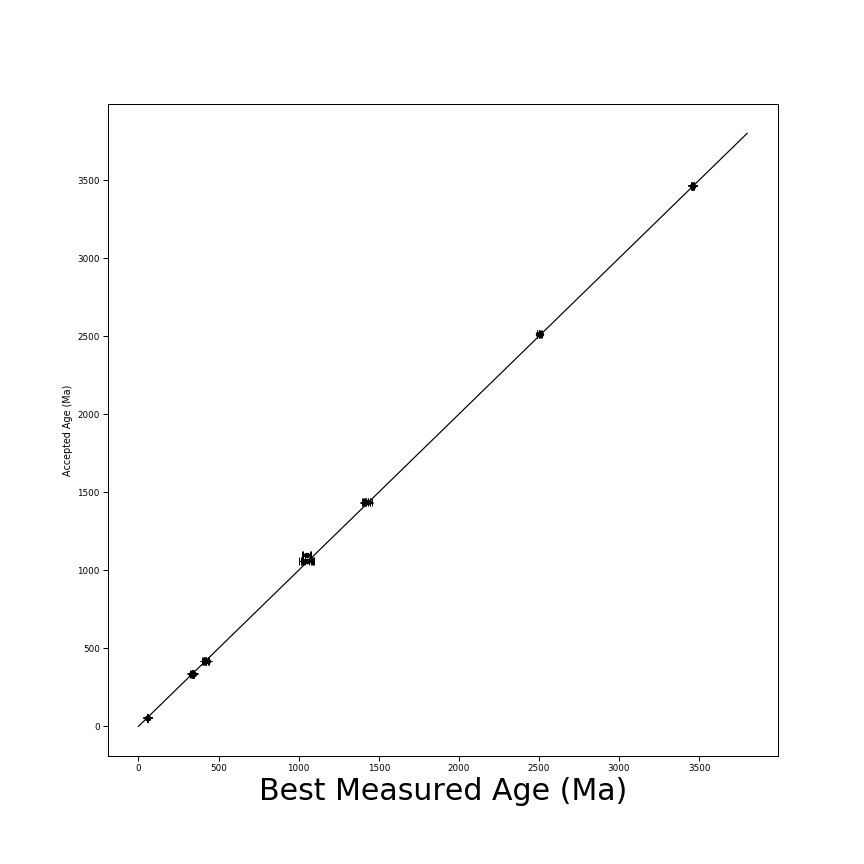

In [172]:
%matplotlib notebook
key='20'
old_df=final[key][final[key]['Accepted Age']>=1000]
young_df=final[key][final[key]['Accepted Age']<=1000]

fig,ax=plt.subplots(figsize=(12,12))
ax.scatter(old_df['Final Pb207/Pb206 age'],old_df['Accepted Age'],color='k',s=20)
ax.scatter(young_df['Final Pb206/U238 age'],young_df['Accepted Age'],color='k',s=20)

ax.errorbar(old_df['Final Pb207/Pb206 age'],old_df['Accepted Age'],
            xerr=old_df['2s Final Pb207/Pb206 age'],yerr=old_df['Accepted Uncertainty'],
           ls='',ecolor='k',capsize=4,capthick=1)
ax.errorbar(young_df['Final Pb206/U238 age'],young_df['Accepted Age'],
            xerr=young_df['2s Final Pb206/U238 age'],yerr=young_df['Accepted Uncertainty'],
           ls='',ecolor='k',capsize=4,capthick=1)
ax.plot([0,3800],[0,3800],color='k')

ax.set_xlabel('Best Measured Age (Ma)',size=30)
ax.set_ylabel('Accepted Age (Ma)');

## 40 um

<IPython.core.display.Javascript object>


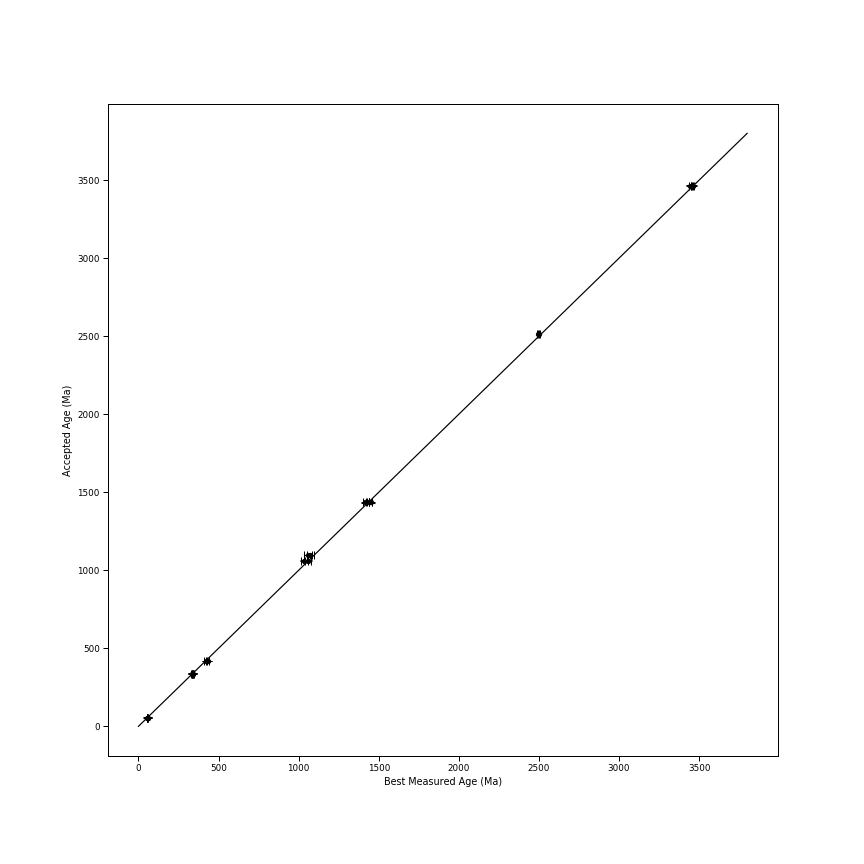

In [171]:
%matplotlib notebook
key='40'
old_df=final[key][final[key]['Accepted Age']>=1000]
young_df=final[key][final[key]['Accepted Age']<=1000]

fig,ax=plt.subplots(figsize=(12,12))
ax.scatter(old_df['Final Pb207/Pb206 age'],old_df['Accepted Age'],color='k',s=20)
ax.scatter(young_df['Final Pb206/U238 age'],young_df['Accepted Age'],color='k',s=20)

ax.errorbar(old_df['Final Pb207/Pb206 age'],old_df['Accepted Age'],
            xerr=old_df['2s Final Pb207/Pb206 age'],yerr=old_df['Accepted Uncertainty'],
           ls='',ecolor='k',capsize=4,capthick=1)
ax.errorbar(young_df['Final Pb206/U238 age'],young_df['Accepted Age'],
            xerr=young_df['2s Final Pb206/U238 age'],yerr=young_df['Accepted Uncertainty'],
           ls='',ecolor='k',capsize=4,capthick=1)
ax.plot([0,3800],[0,3800],color='k')

ax.set_xlabel('Best Measured Age (Ma)')
ax.set_ylabel('Accepted Age (Ma)');

# What is our % Precision?
It looks like for some of these analyses, we are actually within 2% accuracy, but our reported precision is smaller than 2%. Could there be a factor in the uncertainty calculation that I don't know about?

In [165]:
for key in age.keys():
    old_df=final[key][final[key]['Accepted Age']>=1000]
    young_df=final[key][final[key]['Accepted Age']<=1000]
    final[key].loc[old_df.index,'%Precision']=old_df['2s Final Pb207/Pb206 age']/old_df['Final Pb207/Pb206 age']*100
    final[key].loc[young_df.index,'%Precision']=young_df['2s Final Pb206/U238 age']/young_df['Final Pb206/U238 age']*100

## 20 um
### %Precision Each Analysis

In [166]:
final['20'][['Label','%Precision']].sort_values(by='Label')

,Label,%Precision
28,91500,2.376426
35,91500,4.571429
14,91500,1.981132
22,91500,2.410800
7,91500,3.033175
29,9453,5.584642
21,9453,3.658537
15,9453,4.056437
23,9453,3.780069
36,9453,3.185841


### Mean %Precision by Zircon

In [167]:
mean_p_20=final['20'][['Label','%Precision']].groupby(by='Label').mean()
mean_p_20

,%Precision
Label,
91500,2.874592
9453,3.774413
FC1,2.433034
OG1,0.164760
Oracle,0.874712
Ples,1.335105
TANBR,0.264805
Temora2,2.335366


## 40 um
### %Precision Each Analysis

In [152]:
final['40'][['Label','%Precision']].sort_values(by='Label')

,Label,%Precision
15,91500,2.125604
5,91500,1.890359
10,9453,3.442341
16,9453,3.544776
6,9453,2.288732
4,FC1,1.955307
9,FC1,2.268431
8,OG1,0.196640
20,OG1,0.194586
13,OG1,0.167543


### Mean %Precision by Zircon

In [168]:
mean_p_40=final['40'][['Label','%Precision']].groupby(by='Label').mean()
mean_p_40

,%Precision
Label,
91500,2.007982
9453,3.091950
FC1,2.111869
OG1,0.186256
Oracle,0.701126
Ples,0.999225
TANBR,0.264539
Temora2,2.219796


## Is 40 more Precise?
Here I simply take a difference, the mean of the 40 um and the mean of the 20 um.

In [170]:
(mean_p_20-mean_p_40)/mean_p_20*100

,%Precision
Label,
91500,30.147263
9453,18.081308
FC1,13.200175
OG1,-13.047195
Oracle,19.844934
Ples,25.157574
TANBR,0.100585
Temora2,4.948706


Mostly more precise by about 20%

# Clean Up Directory

In [155]:
for file in ['standards_composition.csv','Results_Ples_Reduce_20_um_long.csv','Results_Ples_Reduce_40_um_long.csv',
            '_7807_TRA_Data_burpless.csv','_7807_TRA_Data.csv']:
    os.remove(file)

In [153]:
synthesis_path='/Users/danielbabin/Documents/GitHub/Zircon_Standards/Synthesis/'

In [154]:
for s in final.keys():
    final[s].to_csv(synthesis_path+s+'um_spot_final_table')